In [13]:
# Part 1

# buliding a class hierarchy of the neurons in the nervous system
# the father class - general neuron
class generalneuron:
    def __init__(self, firing_rate):  
        self.firing_rate = firing_rate
    def Activate(self, stimulus):
        pass

# the sensory neuron class is a neuron that inherits from the generalneuron
class sensoryneuron(generalneuron):
     def __init__(self, firing_rate, receptor_type):
         super().__init__(firing_rate)
         self.receptor_type = receptor_type

     def sense_stimulus(self, stimulus):
        # calling the Activate function to handle the stimulus 
         super().Activate(stimulus)
         pass
    
# motor neuron class inheriting from generalneuron
class motor_neuron(generalneuron):
    # initializing neuorns proprities 
    def __init__(self, firing_rate, targetmuscle):
        super.__init__(firing_rate)
        self.targetmascle = targetmuscle

    def control_muscle(self, stimulus):
        # activate the neuron to control the muscle 
        super().Activate(stimulus)
        pass

# a photoreceptor class- a sensory neuron type that detecs light
class photoreceptors(sensoryneuron):
    def __init__(self, firing_rate):
        # the neuron receives a light stimulus (light receptor)
        super.__init__(firing_rate, receptor_type = "light")
    
    def lightdetection(self, stimulus):
        super().sense_stimulus(stimulus)
        pass


# mechanoreceptor class is a sensory neuron that detecs pressure 
class mechanoreceptor(sensoryneuron):
    def __init__(self, firing_rate):
        # the receptor is sensitive to pressure 
        super.__init__(firing_rate, receptor_type = "pressure")

    def pressure_detection(self, stimulus):
        super().sense_stimulus(stimulus)
        pass

# alphamotor neuron class  is a motor neuron that targets the skeletal muscle
class alphamotor_Neuron(motor_neuron):
    def __init__(self, firing_rate):
        # the targeted muscle is the skeletal muscle
        super.__init__(firing_rate, targetmuscle = "skeletal muscle")

    def skeletalmuscle_control(Self, stimulus):
        super().control_muscle(stimulus)
        pass

# the gammamotorneuron class is a motor neuron that targets the muscle spindle
class gammamotorneuron(motor_neuron):
    def __init__(self, firing_rate):
        # the target of this neuron is the muscle spundle 
        super.__init__(firing_rate, targetmuscle = "muscle spindle")
    
    def musclespindelcontrol(self, stimulus):
        super().control_muscle(stimulus)
        pass
    


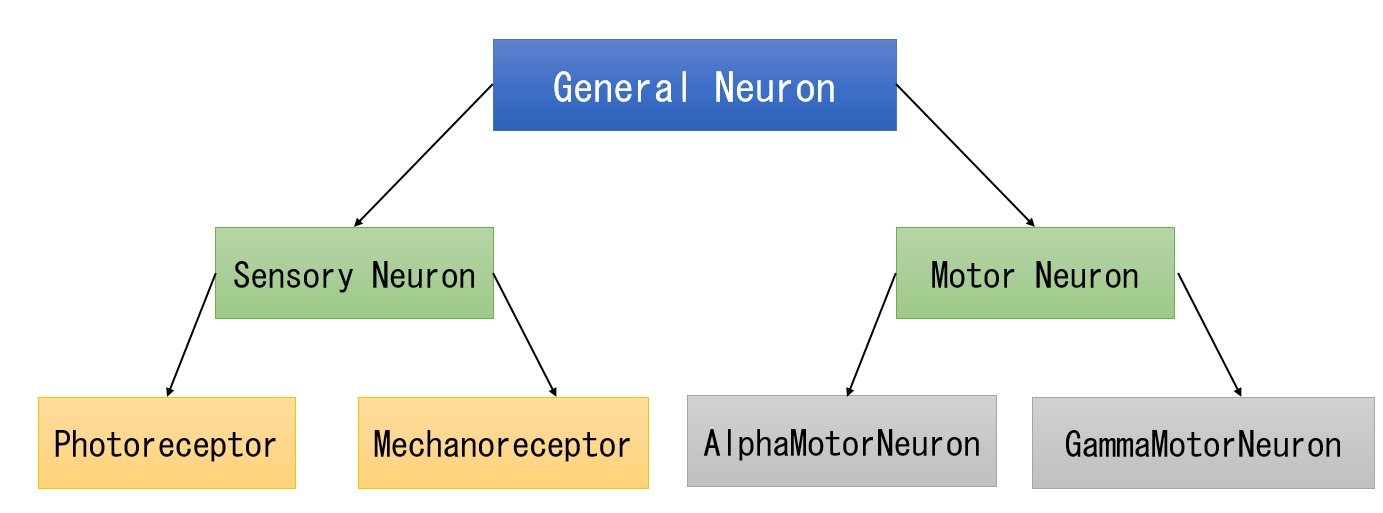

In [14]:
# diagrama of the class hierarchy of the neurons in the nervous system

from IPython.display import Image, display
display(Image("hierarchy-neurons.jpeg"))

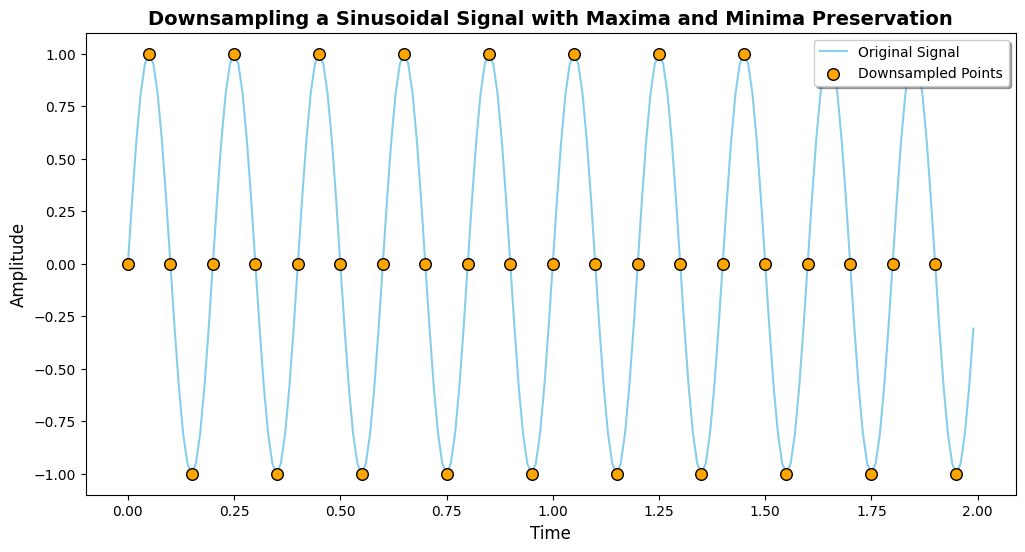

In [15]:
# Part 2 - Q1 

# downsampling (-preserving the maxima and minima)
import numpy as np
import matplotlib.pyplot as plt

# looking for the indices of the local minima in the signal
def minma(sig):
    # identify points where the current value is smaller than it's surronding values
    minn = np.where((sig[1:-1] < sig[:-2]) & (sig[1:-1] < sig[2:]))[0] + 1
    return minn

# looking for indices of local maxima in the signal
def maxima(sig):
    # identify the points where current value is larger than its surronding values
    maxx = np.where((sig[1:-1] > sig[:-2]) & (sig[1:-1] > sig[2:]))[0] + 1
    return maxx

# downsampling a signal while preserving maxima and minima
def downsample_signal_with_extrema(signal, interval):
    # find the indices of maxima and minima
    maxima_ = maxima(signal)
    minima_ = minma(signal)
    # combining the indices of the maxima and minima with the sampled points 
    sampled = np.arange(0, len(signal), interval)
    all = np.union1d(sampled, np.union1d(maxima_, minima_))
    return all, signal[all]


# a helping function to demonstrate the algorithm
def help():
    # generate a sinussoidal signal
    t = np.arange(0, 2, 0.01)  
    # the freqency of the sine wave 
    frequency = 5
    # generating the sine wave
    input_signal = np.sin(2 * np.pi * frequency * t)
    #  downsampling every 5 points 
    downsample_interval = 5
    return downsample_signal_with_extrema(input_signal, downsample_interval), input_signal,t



# main logic to generate and visualize the signal
(indices, downsampled_signal), input_signal, t = help()
# plotting the original and downsamples signals
plt.figure(figsize=(12, 6))
# the original sine wave
plt.plot(t, input_signal, label="Original Signal", color="skyblue")
#downsampled points
plt.scatter(t[indices], downsampled_signal, color="orange", s=70, label="Downsampled Points", edgecolor="black", zorder=3)
plt.title("Downsampling a Sinusoidal Signal with Maxima and Minima Preservation", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.legend(frameon=True, shadow=True, loc="upper right")
plt.show()

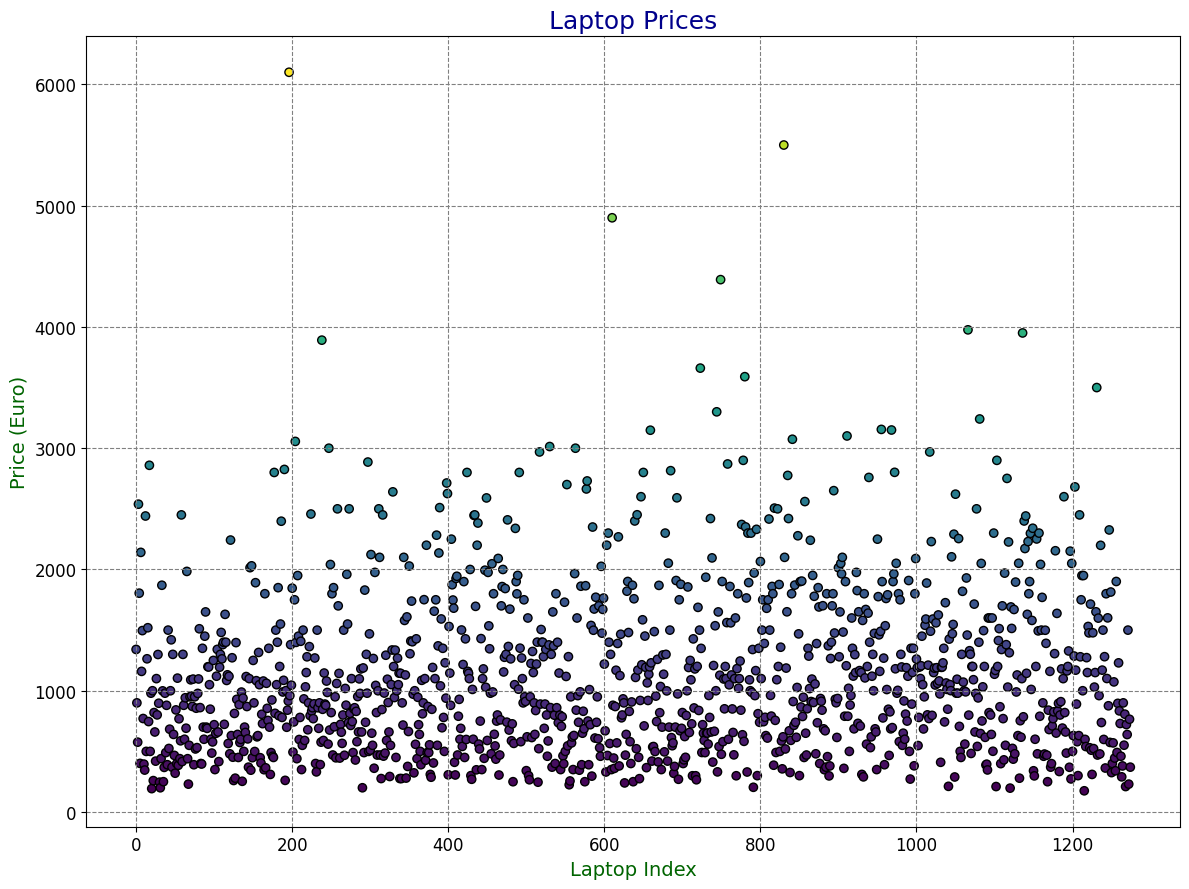

In [16]:
# part2 - Q2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1.opening and reading the CSV file
data = pd.read_csv('laptop_price - dataset.csv')


#  plot the price of the laptop
# initializing a new figure
plt.figure(figsize=(12, 9)) 
# creaing scatter plot, the x-axis = index of data, y-axis = price(euro)
scatter = plt.scatter(
   x=data.index, 
   y=data['Price (Euro)'], 
   c=data['Price (Euro)'], 
   # setting the edge color of the scatter points (k = black)
    edgecolor='k'
)
# customizng and diplaying the scatter plot (e.g., adding titles,styling,adding labels)
plt.title("Laptop Prices", fontsize=18, color='darkblue')
plt.xlabel("Laptop Index", fontsize=14, color='darkgreen')
plt.ylabel("Price (Euro)", fontsize=14, color='darkgreen')
plt.grid(color='gray', linestyle='--')
plt.tick_params(axis='both', labelsize=12, colors='black')
plt.tight_layout()
# display the final plot 
plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2.classify by the company column, calculates the average of the price for each company.
data = pd.read_csv('laptop_price - dataset.csv')

average = data.groupby('Company')['Price (Euro)'].mean()
print("Average Laptop Price by Company:")
print(average)
# looking for the highest average company 
exp_company = average.idxmax()
price_company = average.max()
print("\nCompany with the most expensive laptops on average:")
print(f"{exp_company} with an average price of {price_company:.2f} Euros.")

Average Laptop Price by Company:
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64

Company with the most expensive laptops on average:
Razer with an average price of 3346.14 Euros.


In [18]:
# 3.unifying the naming of OS in the dataset ( and ensures consistency)
print("Operating Systems before uniform:")
# display the unique values in the OpSysy column to show the variety of OS names currently in the database
print(data['OpSys'].unique())
# initializing a dict ('original OS names': 'new unified names')
replacment = {
   'Mac OS X': 'macOS',
   'Windows 7': 'Windows',
   'Windows 10 S': 'Windows',
   'Windows 10': 'Windows' 
}
# replacing the OS names in the opsys column (using the dict), ensuring that any OS not found in the dict remains unchanged
# diplaying the unique values in the OpSys column to verify the changes
data['OpSys'] = data['OpSys'].map(replacment).fillna(data['OpSys'])
print("Unique Operating Systems after unifying:")
print(data['OpSys'].unique())


Operating Systems before uniform:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
Unique Operating Systems after unifying:
['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


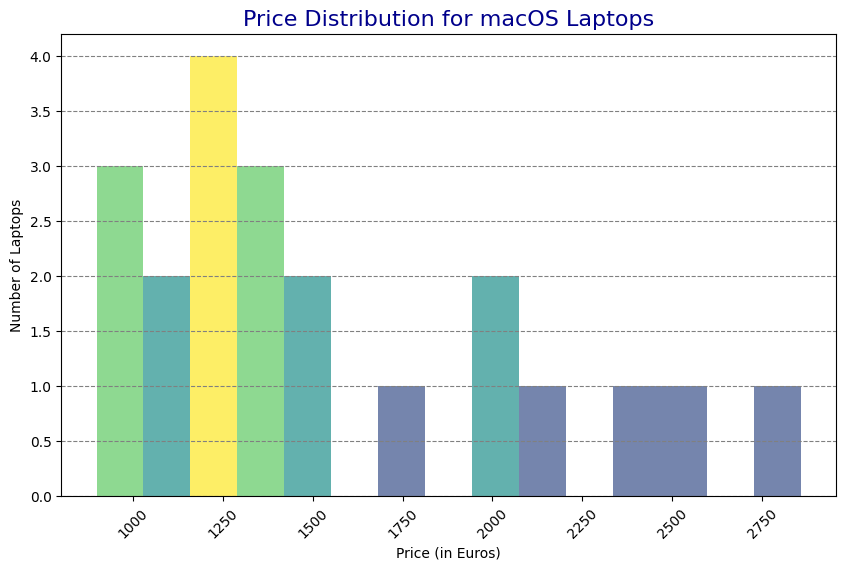

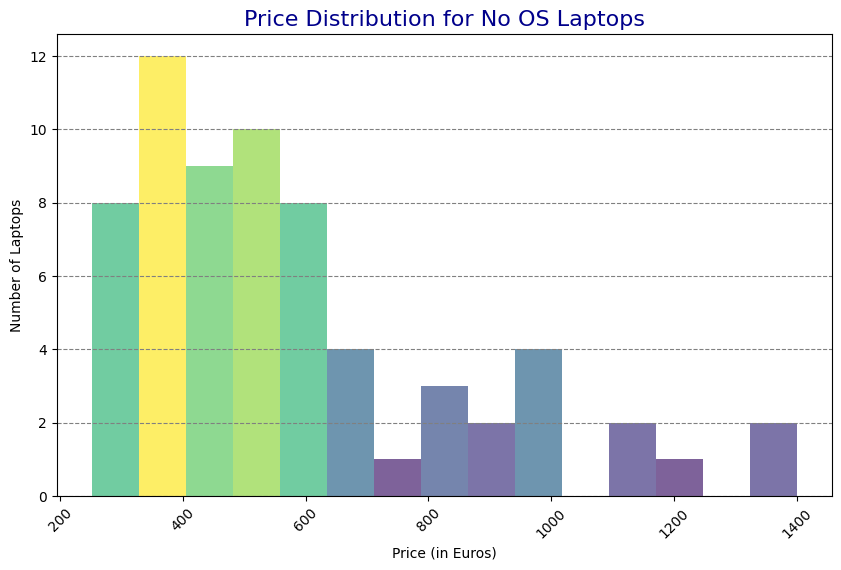

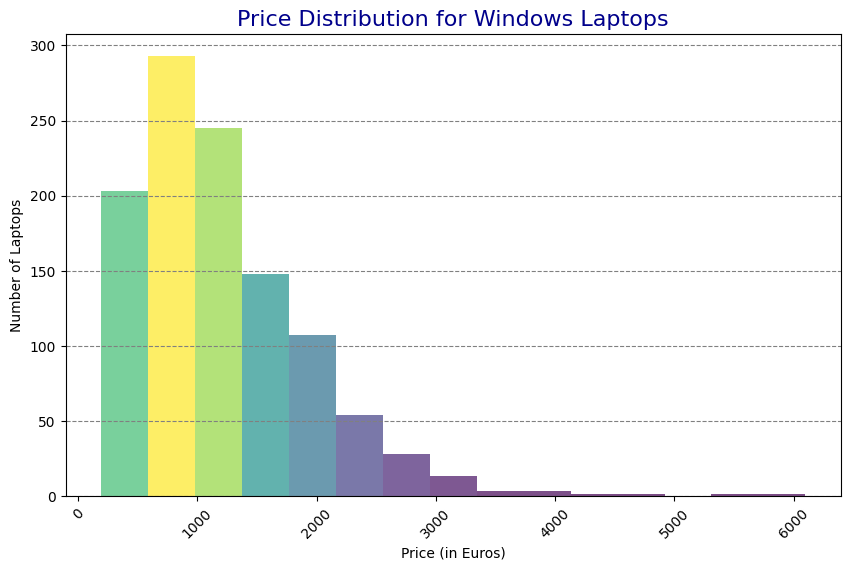

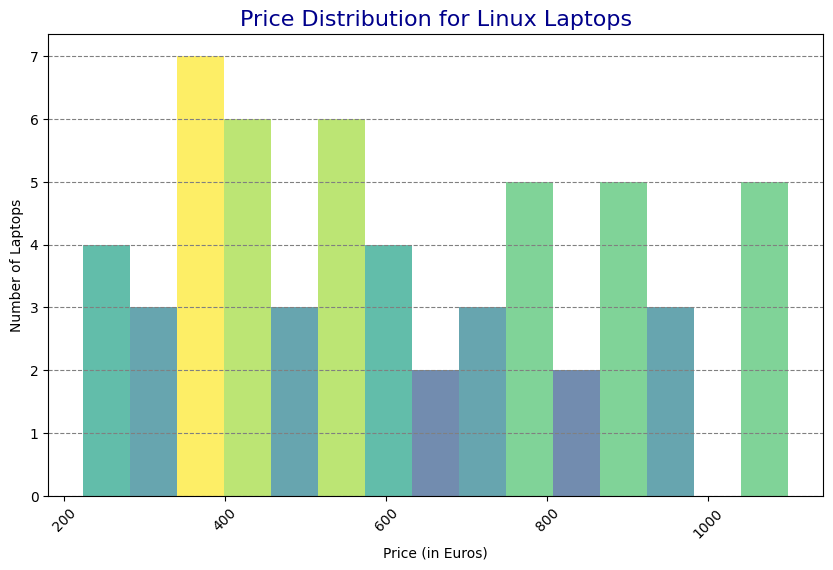

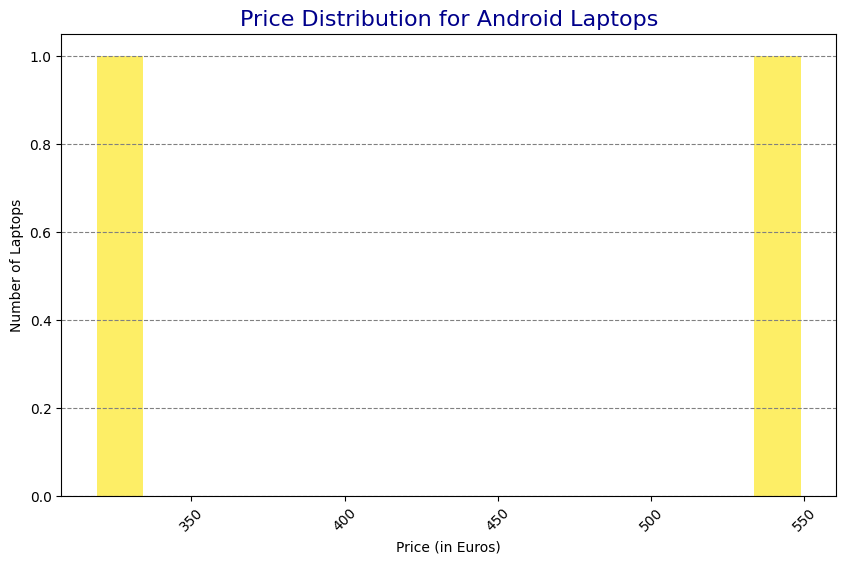

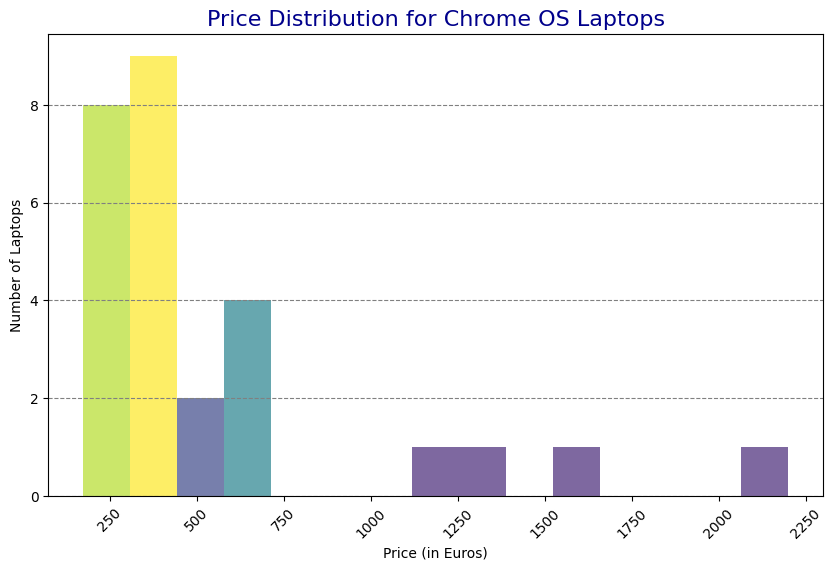

In [19]:
# 4.creating an individual histograms of laptop prices for each operating system in the database (price/distributions)

# loop through each unique operating system in the OpSys column
for op_sys in data['OpSys'].unique():
   # filtersing the lapotp prices for current operating system 
   op_sys_prices = data[data['OpSys'] == op_sys]['Price (Euro)']
   # creating a new figure for histogram
   plt.figure(figsize=(10, 6))
   # plot histogram for: laptop prices 
   hist_counts, bins, patches = plt.hist(
       op_sys_prices, bins=15, color='blue', alpha=0.7
   )
   # assigns bar colors based on the height- the taller bars : darker
   for patch, count in zip(patches, hist_counts):
       patch.set_facecolor(plt.cm.viridis(count / max(hist_counts)))
   # titles and labels for the plots
   plt.title(f"Price Distribution for {op_sys} Laptops", fontsize=16, color='darkblue')
   plt.xlabel("Price (in Euros)", fontsize=10)
   plt.ylabel("Number of Laptops", fontsize=10)
   plt.grid(axis='y', color='gray', linestyle='--')
   plt.xticks(fontsize=10, rotation=45)
   plt.yticks(fontsize=10)
   plt.show()


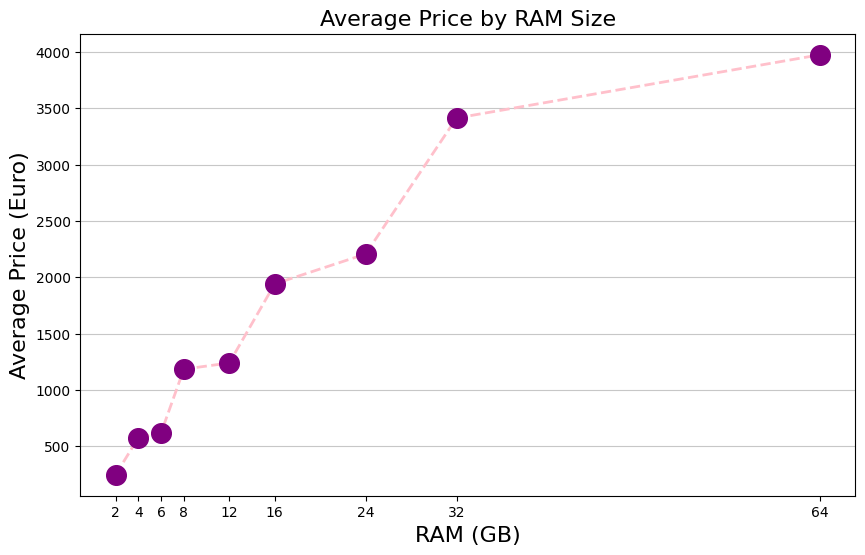

In [20]:
# 5.visualizing the relation between RAM size and the average laptop price 
# calculating the average price for each RAM size 
average_ram = data.groupby('RAM (GB)')['Price (Euro)'].mean()
# creating a scatter
plt.figure(figsize=(10, 6))
# excavate average prices, RAM sizes for plotting 
average_prices = average_ram.values
ram_sizes = average_ram.index
# plotting the scatter points 
plt.scatter(ram_sizes, average_prices, color='purple', s=200,  zorder=5)
# connecting the points to creat a line 
plt.plot(ram_sizes, average_prices, color='pink', linestyle='--', linewidth=2)
plt.title("Average Price by RAM Size", fontsize=16)
plt.xlabel("RAM (GB)", fontsize=16)
plt.ylabel("Average Price (Euro)", fontsize=16)
plt.xticks(ram_sizes, fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.show()





In [21]:
# 6.extracting the storage type/s from the memory column and stores the storage types
# finding the storage type info from the memory column 
data["Storage type"] = data["Memory"].apply(
   # handling each storage type depending on :(if its not multiple split and return without the first word, if its with multiple type(+) process separately)
   lambda str1: " ".join(str1.split()[1:]) if "+" not in str1 else 
   " ".join(str1.split(" + ")[0].split()[1:]) + "  " + " ".join(str1.split(" + ")[1].split()[1:])
   if " ".join(str1.split(" + ")[0].split()[1:]) != " ".join(str1.split(" + ")[1].split()[1:])
   else " ".join(str1.split(" + ")[0].split()[1:])
)
# I print this line to make sure that the code is working... for example
print(data.loc[447, ['Memory', 'Storage type']])


Memory          64GB Flash Storage +  1TB HDD
Storage type               Flash Storage  HDD
Name: 447, dtype: object
